In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


60000 train set
10000 test set
y =0T-shirt/top


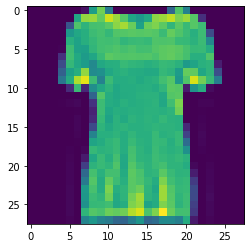

In [ ]:
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

img_index = 10

label_index = y_train[img_index]
print('y ='+ str(label_index) + '' + (fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

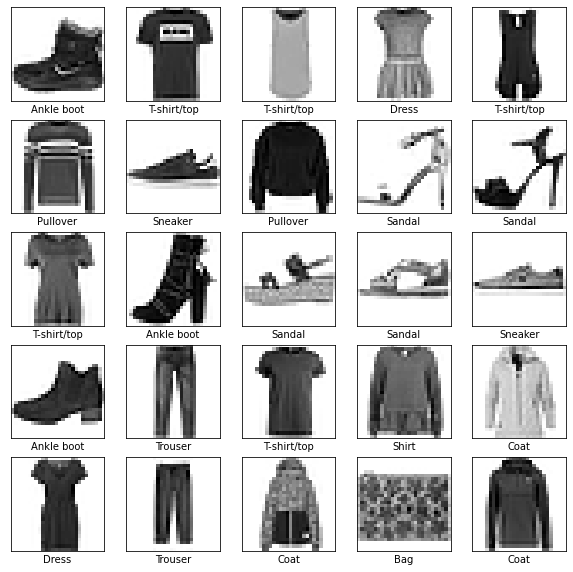

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(fashion_mnist_labels[y_train[i]])
plt.show()

In [ ]:
model = models.Sequential()

model.add(Conv2D(4,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(8,(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 8)         296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          2336      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 10)               

In [ ]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 라벨이 정수의 형태를 띌때 saprse_categorical_crossentropy를 사용

In [ ]:
x_train = np.expand_dims(x_train, axis=-1) # Conv2D는 input_shape가 4차원이어야 하기 때문에 끝에 채널을 늘려줌.

In [ ]:
hist = model.fit(x_train, y_train, validation_split=0.2,
                 epochs=20,
                 shuffle=True)

Epoch 1/20
1500/1500 [==============================] - 18s 12ms/step - loss: 1.0667 - accuracy: 0.7301 - val_loss: 0.5515 - val_accuracy: 0.8027
Epoch 2/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5068 - accuracy: 0.8161 - val_loss: 0.4909 - val_accuracy: 0.8225
Epoch 3/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.4470 - accuracy: 0.8351 - val_loss: 0.4519 - val_accuracy: 0.8313
Epoch 4/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.4173 - accuracy: 0.8461 - val_loss: 0.4212 - val_accuracy: 0.8472
Epoch 5/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3897 - accuracy: 0.8561 - val_loss: 0.4313 - val_accuracy: 0.8415
Epoch 6/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3725 - accuracy: 0.8613 - val_loss: 0.3964 - val_accuracy: 0.8558
Epoch 7/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3613 - accuracy: 0.8669 - val_loss: 0.4102 -

In [ ]:
history_dict = hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

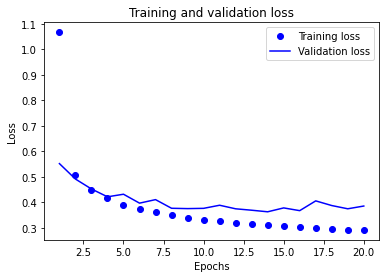

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss= hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

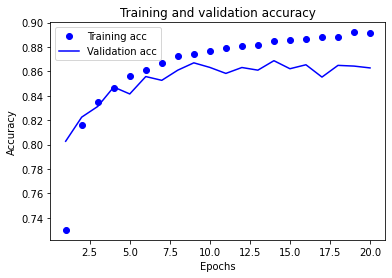

In [ ]:
plt.clf()   # 그래프를 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\n테스트 정확도', test_acc)

313/313 - 2s - loss: 0.3995 - accuracy: 0.8626

테스트 정확도 0.8626000285148621


In [ ]:
predictions = model.predict(x_test)

In [ ]:
print(predictions[0])

[5.5719661e-12 4.1382647e-11 4.6406645e-13 1.0464968e-11 3.8895750e-17
 1.5521655e-06 2.7711823e-14 1.2042281e-05 8.3905096e-12 9.9998641e-01]


In [ ]:
np.argmax(predictions[0])

9

In [ ]:
fashion_mnist_labels[np.argmax(predictions[0])]

'Ankle boot'